<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/MultipleAngleFormula_cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Multiple Angle Formula for $\cos(n\theta)$</h1></b>

Dr. Bingsen Wang

11/2/2024
</center>

Based on Euler's identity
$$\cos(n\theta) = \frac{e^{jn\theta} + e^{-jn\theta}}{2}\tag{1}$$

Since
$$e^{jn\theta} + e^{-jn\theta} = (e^{j\theta} + e^{-j\theta})\left[e^{j(n-1)\theta} + e^{-j(n-1)\theta}\right]-\left[e^{j(n-2)\theta}+e^{-j(n-2)\theta}\right]\tag{2}$$

It follows that
$$\begin{align}
\cos(n\theta) &=2\frac{(e^{j\theta} + e^{-j\theta})\left[e^{j(n-1)\theta} + e^{-j(n-1)\theta}\right]}{4} -\frac{e^{j(n-2)\theta}+e^{-j(n-2)\theta}}{2}\\
&=2\cos\theta\cos(n-1)\theta - \cos(n-2)\theta
\end{align}
\tag{3}$$

#Python Code

0
0
250
500
750
0


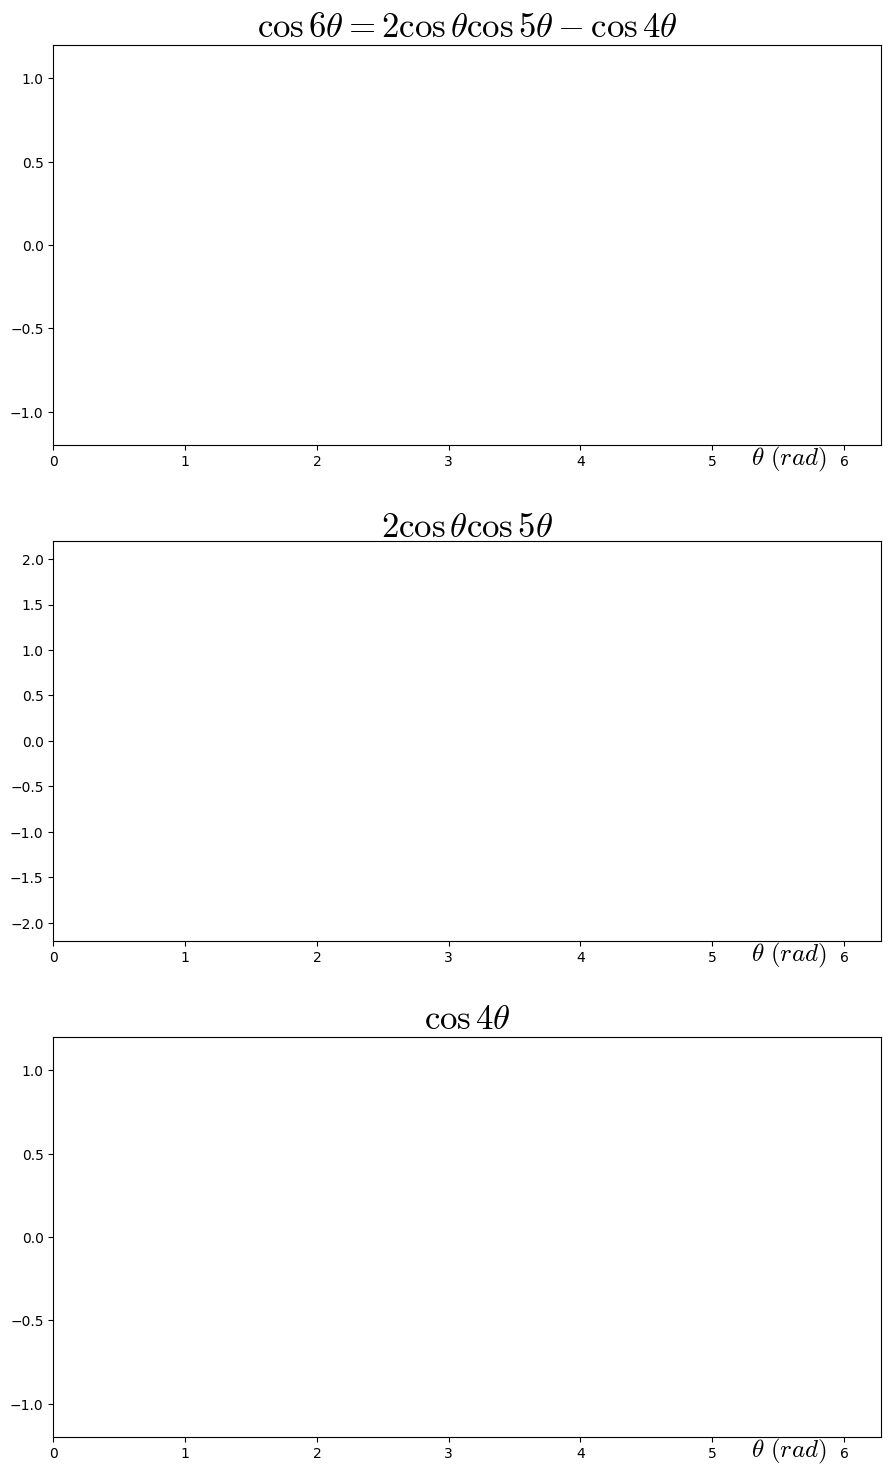

In [54]:
from os import linesep
import numpy as np
from numpy import linspace,logspace,cos,sin,pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

#parameters
Nf = 250 # number of frames
N=4 #n = 2,3,...,2+N-1
theta = linspace(0,2*pi,Nf)
y1,y2,y3 = [],[],[]
for k in range(4):
  n=2+N-k
  y1.append(cos(n*theta))
  y2.append(2*cos((n-1)*theta)*cos(theta))
  y3.append(cos((n-2)*theta))
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_frame = [[[.05,.67, .92,.25], [0,2*pi], [-1.2,1.2]], # cos(n*theta)
            [[.05,.36,.92,.25], [0,2*pi], [-2.2,2.2]], # 2*cos(theta)*cos[(n-1)theta]
            [[.05, 0.05, .92,.25], [0,2*pi], [-1.2,1.2]], # cos((n-2)*theta)
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl = [['',r'$\theta\ (rad)$'], ['',r'$\theta\ (rad)$'],['',r'$\theta\ (rad)$']]
clst = list(mpl.cm.tab10.colors) #colors of lines
ax_lst,ylabels,lines=[],[],[]
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax_lst.append(ax)
  ax.text(xm-.7,yn,ax_lbl[k][-1],size=18, va='top', ha='center') #x-axis label
  ylabels.append(ax.text(.5*xm,ym+.05,ax_lbl[k][0], size=25,ha='center')) #y-axis label
  lines.append(ax.plot([],[],color=clst[k],lw=3)[0])

def animate(ii):
  i = ii%Nf
  k = ii//Nf
  n = 2+N-k
  if i==0:
    print(ii) #for monitoring
    ylabels[0].set_text(rf'$\cos{n}\theta=2\cos\theta\cos{n-1}\theta - \cos{n-2}\theta$')
    ylabels[1].set_text(rf'$2\cos\theta\cos{n-1}\theta$')
    ylabels[2].set_text(rf'$\cos{n-2}\theta$')
  lines[0].set_data(theta[:i+1],y1[k][:i+1])
  lines[1].set_data(theta[:i+1],y2[k][:i+1])
  lines[2].set_data(theta[:i+1],y3[k][:i+1])
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*N, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following line
anim.save("multipleAngle_cosine.mp4", writer=animation.FFMpegWriter(fps=50), dpi = 200)